In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gensim.models import Word2Vec, word2vec

pd.set_option('display.max_rows', 4200)
%load_ext autoreload
%autoreload 2

In [2]:
LABEL_FILE = "../data/verified/all_labels.csv"
WORD2VEC_MODEL_FILE = "../models/word2vec/verified_word2vec.model"
MIN_WORD_FREQ = 3

In [3]:
## Load model
print("Loading {}".format(WORD2VEC_MODEL_FILE))
word2vec_master = Word2Vec.load(WORD2VEC_MODEL_FILE)
print("\tVocabulary shape:", word2vec_master.wv.vectors.shape)

Loading ../models/word2vec/verified_word2vec.model
	Vocabulary shape: (774, 64)


In [4]:
with open(LABEL_FILE, 'r') as f:
    lines = f.readlines()
lines = list(map(lambda s: s.strip().split(',')[1:], lines))

In [5]:
all_labels = []
for line in lines:
    all_labels.extend(line)

n_all_labels = len(all_labels)
print("# of all labels:", n_all_labels)

# of all labels: 27650


In [6]:
label_counts = pd.value_counts(all_labels)
label_counts = label_counts.reindex(word2vec_master.wv.vocab.keys()).dropna()  ## Drop words not in vocabulary
label_counts = label_counts.sort_values(ascending=False).astype(int)
n_labels = len(label_counts)
print("# of unique labels:", n_labels)

# of unique labels: 738


In [7]:
label_counts.keys()

Index(['painting', 'scenery', 'realism', 'female', 'impressionism', 'portrait',
       'animal', 'landscape', 'male', 'woman',
       ...
       'horseman', 'fruit', 'spiral', 'tentacle', 'tool', 'coin', 'mushroom',
       'archangel', 'balloon', 'stand'],
      dtype='object', length=738)

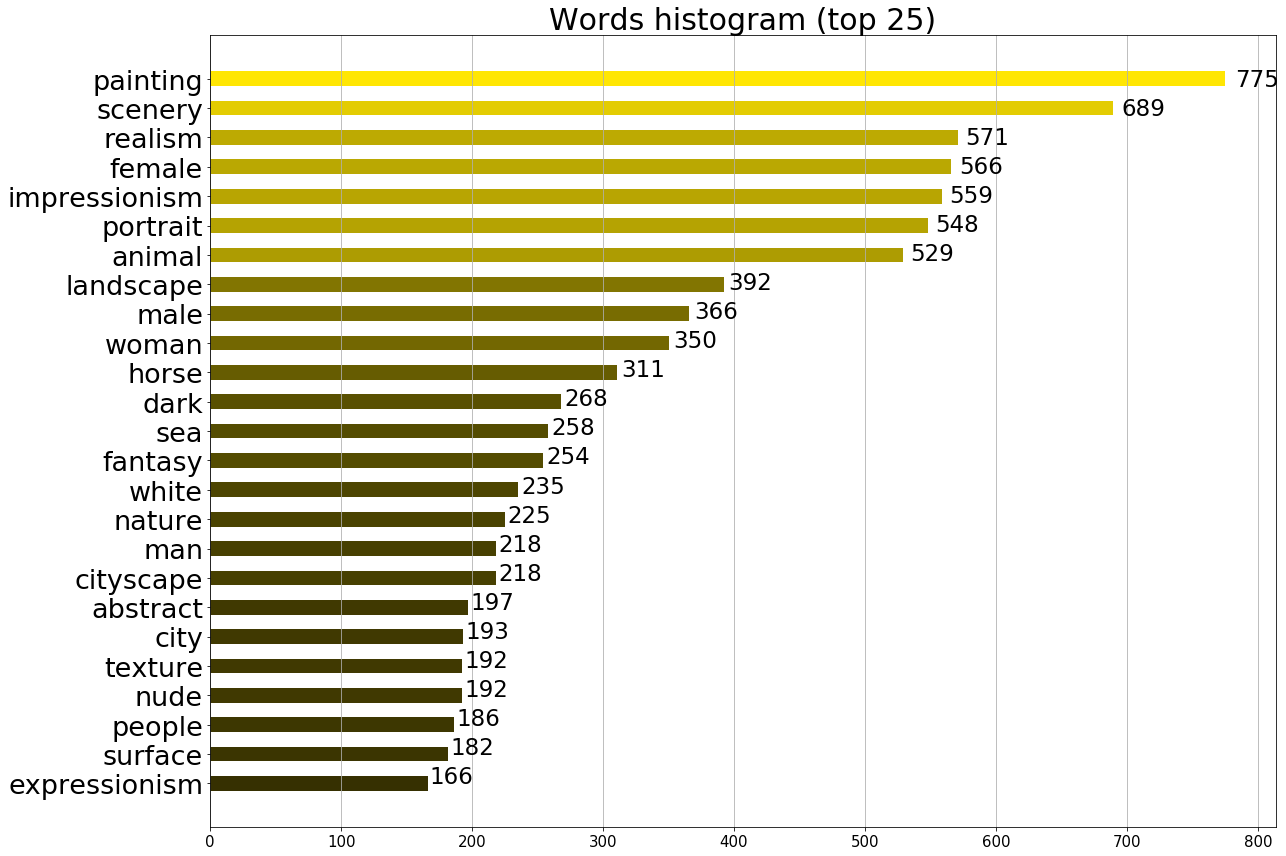

In [21]:
size = 25
bar_width = 0.8
x_labels = np.array(label_counts.keys())[:size][::-1]
x_array = np.arange(n_labels)[:size]
y_array = label_counts.values[:size][::-1]

norm_y_array = (y_array / y_array.max()).round(2)
colors = np.vstack((norm_y_array, norm_y_array, norm_y_array)).T
colors[:, 1] = colors[:, 1] * 0.90
colors[:, 2] = colors[:, 2] * 0.01

plt.figure(figsize=(18, 12))
plt.grid(axis='x')
plt.barh(x_array, y_array,
        height=0.5, color=colors, label='Alone')
# plt.xticks([r + bar_width for r in range(len(x_array))], x_labels)
plt.xticks(fontsize=15)
plt.yticks(np.arange(size), x_labels, rotation=0, size=27)
plt.title("Words histogram (top {})".format(size), fontsize=30)

for i, count in enumerate(y_array):
    plt.text(y=i*0.990, x=count*1.01, s=count, size=23)

plt.tight_layout()
plt.savefig("words_histogram_25.png")
# plt.show()

## Sentence lengths

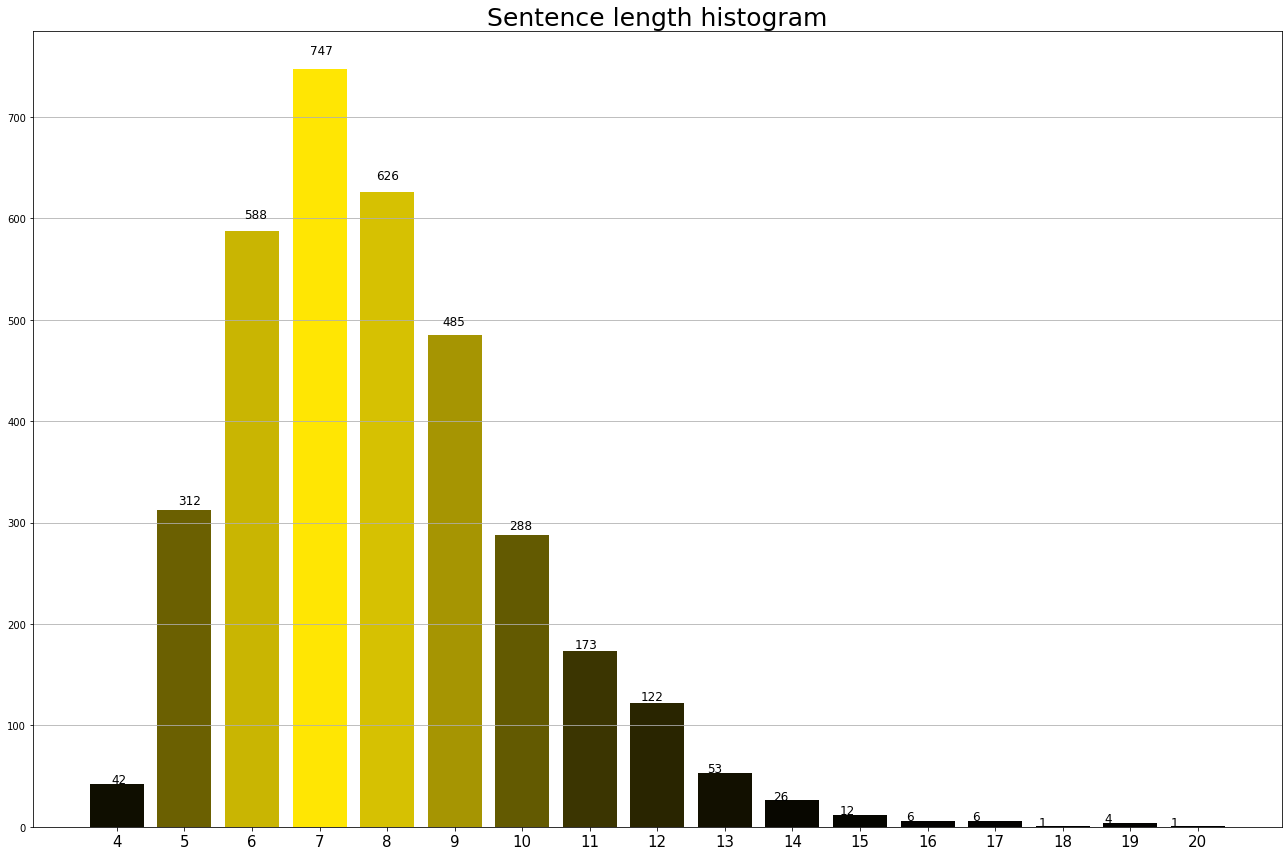

In [64]:
lengths = [len(line) for line in lines]
length_counts = pd.value_counts(lengths)
size = len(length_counts)

bar_width = 0.8
x_array = np.array(length_counts.keys())
y_array = length_counts.values

norm_y_array = (y_array / y_array.max()).round(2)
colors = np.vstack((norm_y_array, norm_y_array, norm_y_array)).T
colors[:, 1] = colors[:, 1] * 0.90
colors[:, 2] = colors[:, 2] * 0.01

plt.figure(figsize=(18, 12))
plt.grid(axis='y')

plt.bar(x_array, y_array, color=colors)
plt.xticks(x_array, fontsize=15)
plt.title("Sentence length histogram", fontsize=25)

for i, count in enumerate(y_array):
    plt.text(y=count*1.02, x=x_array[i]*0.98, s=count, size=12)

plt.tight_layout()
plt.savefig("sentence_length_histogram.png", pad_inches=0, bbox_inches=0)
plt.show()